In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix 

In [2]:
# Chargement du jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

# Pretraitement des donnees

In [4]:
# Normalisation des images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Conversion des étiquettes en catégories one-hot
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [5]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# creation du modele

In [6]:
# Construction du modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# Entraînement et évaluation du modèle 

In [9]:
# Entraînement du modèle

batch_size  = 60
epochs      =  20

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      validation_data = (x_test, y_test))

#model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Précision sur l'ensemble de test: {test_acc:.4f}")


Epoch 1/20
834/834 [==============================] - 60s 71ms/step - loss: 1.3096 - accuracy: 0.5370 - val_loss: 1.1794 - val_accuracy: 0.5782
Epoch 2/20
834/834 [==============================] - 61s 73ms/step - loss: 1.1006 - accuracy: 0.6151 - val_loss: 1.0757 - val_accuracy: 0.6199
Epoch 3/20
834/834 [==============================] - 62s 75ms/step - loss: 0.9740 - accuracy: 0.6594 - val_loss: 1.0079 - val_accuracy: 0.6514
Epoch 4/20
834/834 [==============================] - 63s 76ms/step - loss: 0.8955 - accuracy: 0.6898 - val_loss: 0.9708 - val_accuracy: 0.6684
Epoch 5/20
834/834 [==============================] - 64s 77ms/step - loss: 0.8265 - accuracy: 0.7128 - val_loss: 0.9250 - val_accuracy: 0.6833
Epoch 6/20
834/834 [==============================] - 64s 77ms/step - loss: 0.7608 - accuracy: 0.7352 - val_loss: 0.9220 - val_accuracy: 0.6848
Epoch 7/20
834/834 [==============================] - 65s 78ms/step - loss: 0.7036 - accuracy: 0.7560 - val_loss: 0.9503 - val_accuracy:

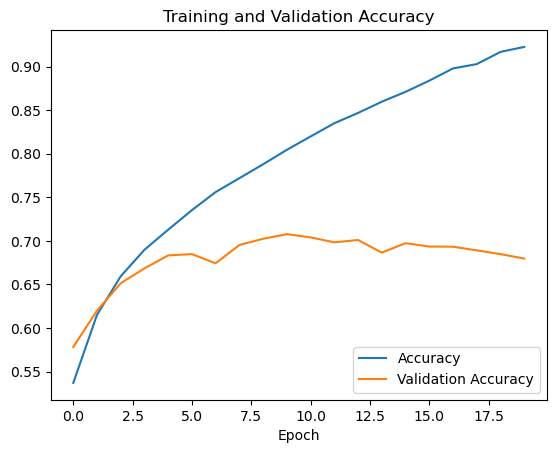

In [10]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

plt.show()

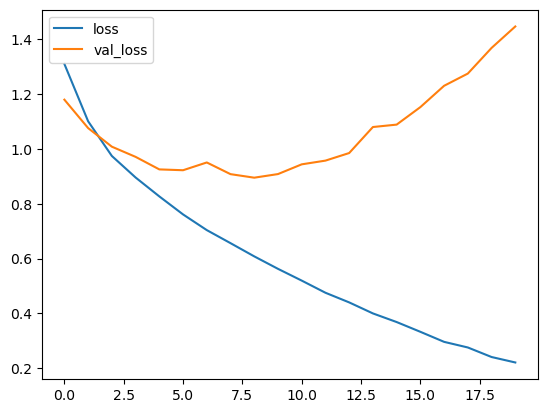

In [11]:
# Affichons les courbes d'apprentissage
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

# Prediction 

In [12]:
# Prédictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 4s 13ms/step


#  Visualisation de quelques prédictions

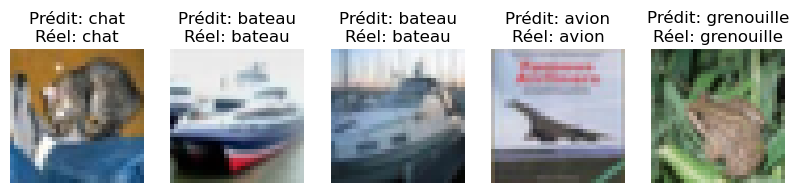

In [13]:
class_names = ['avion', 'automobile', 'oiseau', 'chat', 'cerf', 'chien', 'grenouille', 'cheval', 'bateau', 'camion']

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Prédit: {class_names[y_pred_classes[i]]}\nRéel: {class_names[y_true_classes[i]]}")
    plt.axis('off')
plt.show()